In [169]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [170]:
data = pd.read_csv('train.csv')

data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [171]:
data['text'] = data['text'].str.upper()

In [172]:
data['text'] = data['text'].str.replace(r"&AMP", ' ', regex=True)
data['text'] = data['text'].str.replace(r"&GT", ' ', regex=True)
data['text'] = data['text'].str.replace(r"@+", '', regex=True)
data['text'] = data['text'].str.replace("?", '? ')
data['text'] = data['text'].str.replace("!", '! ')
data['text'] = data['text'].str.replace(r"HTTP\S+", '', regex=True)
data['text'] = data['text'].str.replace(r"[^A-Z0-9 ]", ' ', regex=True)
data['text'] = data['text'].str.replace(r"\d+(?=[A-Z])", '', regex=True)
data['text'] = data['text'].str.replace("Á", 'A', regex=True)
data['text'] = data['text'].str.replace("É", 'E', regex=True)
data['text'] = data['text'].str.replace("Í", 'I', regex=True)
data['text'] = data['text'].str.replace("Ó", 'O', regex=True)
data['text'] = data['text'].str.replace("Ú", 'U', regex=True)
data['text'] = data['text'].str.replace(r" +", ' ', regex=True)

In [173]:
data['location'] = data['location'].str.upper()

In [174]:
data['location'] = data['location'].str.replace(r"[^A-Z0-9 ]", '', regex=True)
data['location'] = data['location'].str.replace(r" +", ' ', regex=True)
data['location'] = data['location'].replace(" ", np.nan)

In [175]:
data['keyword'] = data['keyword'].str.upper()
data['keyword'] = data['keyword'].str.replace("%20", ' ', regex=True)

In [176]:
for tweet in data:
    print(tweet)

id
keyword
location
text
target


In [177]:
disaster_tweets = data[data['target'] == 1]['text'].tolist()
non_disaster_tweets = data[data['target'] == 0]['text'].tolist()

In [178]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/estebandonis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/estebandonis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/estebandonis/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [179]:
stop_words = set(stopwords.words('english'))

def get_word_freq(tweets):
    words = []
    for tweet in tweets:
        words.extend([word.lower() for word in word_tokenize(tweet) if word.isalnum() and word.lower() not in stop_words])
    return FreqDist(words)

# Assuming disaster_tweets and non_disaster_tweets are defined
disaster_freq = get_word_freq(disaster_tweets)
non_disaster_freq = get_word_freq(non_disaster_tweets)

In [180]:
disaster_common = disaster_freq.most_common(20)
non_disaster_common = non_disaster_freq.most_common(20)

print("Palabras más comunes en tweets de desastres:")
print(disaster_common)
print("\nPalabras más comunes en tweets que no son de desastres:")
print(non_disaster_common)

Palabras más comunes en tweets de desastres:
[('fire', 182), ('news', 144), ('disaster', 121), ('via', 121), ('california', 115), ('suicide', 112), ('police', 109), ('people', 105), ('2', 102), ('killed', 95), ('like', 94), ('hiroshima', 92), ('storm', 89), ('fires', 86), ('pm', 86), ('crash', 85), ('families', 81), ('train', 79), ('emergency', 77), ('bomb', 76)]

Palabras más comunes en tweets que no son de desastres:
[('like', 254), ('new', 171), ('get', 163), ('one', 133), ('body', 116), ('2', 114), ('would', 101), ('via', 99), ('video', 96), ('people', 95), ('got', 94), ('love', 91), ('day', 86), ('know', 86), ('time', 85), ('back', 85), ('3', 84), ('full', 84), ('see', 82), ('emergency', 81)]


In [181]:
from nltk import bigrams, trigrams

def get_ngram_freq(tweets, n):
    ngrams = []
    for tweet in tweets:
        tokens = [word.lower() for word in word_tokenize(tweet) if word.isalnum() and word.lower() not in stop_words]
        if n == 2:
            ngrams.extend(list(bigrams(tokens)))
        elif n == 3:
            ngrams.extend(list(trigrams(tokens)))
    return FreqDist(ngrams)

disaster_bigrams = get_ngram_freq(disaster_tweets, 2)
disaster_trigrams = get_ngram_freq(disaster_tweets, 3)

print("\nBigramas más comunes en tweets de desastres:")
print(disaster_bigrams.most_common(10))
print("\nTrigramas más comunes en tweets de desastres:")
print(disaster_trigrams.most_common(10))


Bigramas más comunes en tweets de desastres:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 36), (('suicide', 'bombing'), 35), (('california', 'wildfire'), 34), (('70', 'years'), 30), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('yr', 'old'), 29)]

Trigramas más comunes en tweets de desastres:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('families', 'sue', 'legionnaires'), 26)]


In [182]:
# Combine disaster and non-disaster frequencies into a single dataframe
disaster_freq_df = pd.DataFrame(disaster_freq.most_common(20), columns=['word', 'frequency'])
disaster_freq_df['type'] = 'disaster'
non_disaster_freq_df = pd.DataFrame(non_disaster_freq.most_common(20), columns=['word', 'frequency'])
non_disaster_freq_df['type'] = 'non_disaster'
combined_freq_df = pd.concat([disaster_freq_df, non_disaster_freq_df])
combined_freq_df.reset_index(drop=True, inplace=True)
combined_freq_df.sort_values('frequency', ascending=False, inplace=True)
combined_freq_df.head(15)

,word,frequency,type
20,like,254,non_disaster
0,fire,182,disaster
21,new,171,non_disaster
22,get,163,non_disaster
1,news,144,disaster
23,one,133,non_disaster
3,via,121,disaster
2,disaster,121,disaster
24,body,116,non_disaster
4,california,115,disaster


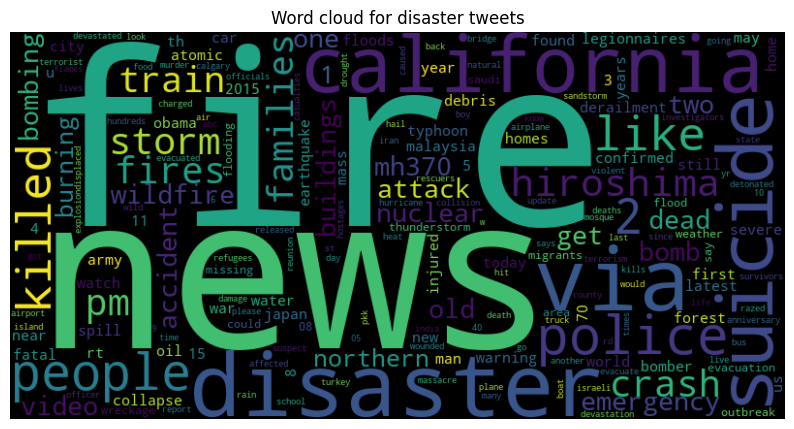

In [183]:
# Word cloud for disaster tweets
from wordcloud import WordCloud

disaster_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(disaster_freq)
plt.figure(figsize=(10, 6))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for disaster tweets')
plt.show()

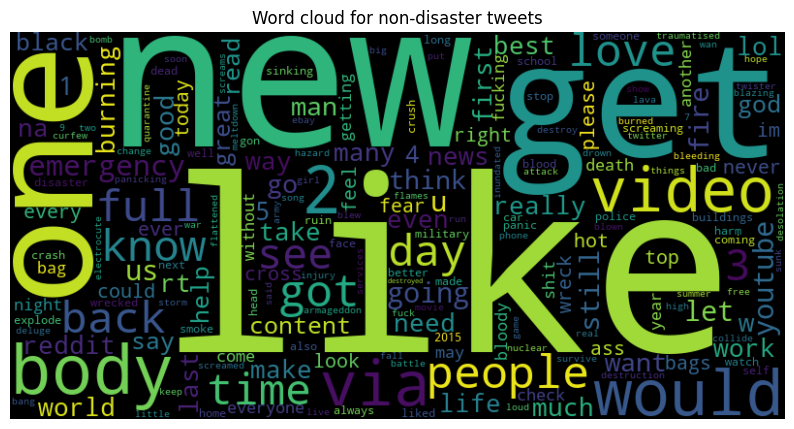

In [184]:
# Word cloud for non-disaster tweets
non_disaster_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(non_disaster_freq)
plt.figure(figsize=(10, 6))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for non-disaster tweets')
plt.show()

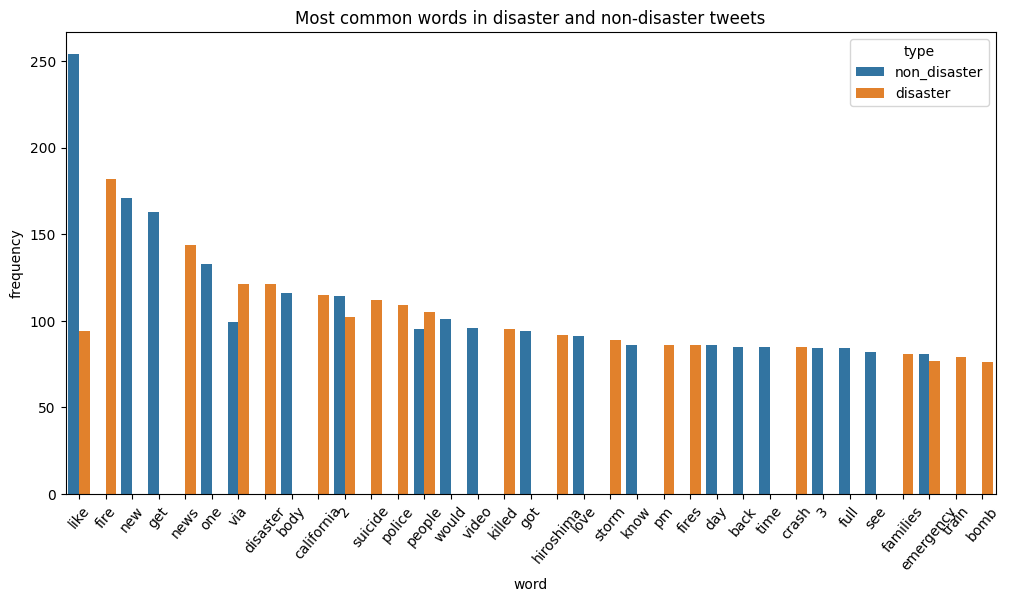

In [185]:
# Most common words in disaster and non-disaster tweets histogram
plt.figure(figsize=(12, 6))
sb.barplot(x='word', y='frequency', hue='type', data=combined_freq_df)
plt.title('Most common words in disaster and non-disaster tweets')
plt.xticks(rotation=50)
plt.show()

In [186]:
# Determinar palabras positivas, negativas y neutrales en los tweets
positive_words = ['like', 'love', 'good', 'great', 'lol']
negative_words = ['disaster', 'suicide', 'bad', 'ruin', 'fear', 'injured', 'fatal', 'devastated', 'killed', 'kills']

In [187]:

tweets = pd.DataFrame(columns=['text', 'target', 'score'])
tweets['text'] = data['text']
tweets['target'] = data['target']

def score_tweet(row):
    text: str = row["text"].lower()
    text = text.split()
    
    score = 0
    for word in text:
        if word in positive_words:
            score += 1
        if word in negative_words:
            score -= 1
            
    return score
    
tweets['score'] = tweets.apply(score_tweet, axis=1)
tweets.sort_values('score', ascending=True, inplace=True)

data['negativity'] = tweets['score']
data

,id,keyword,location,text,target,negativity
0,1,NaN,NaN,OUR DEEDS ARE THE REASON OF THIS EARTHQUAKE MA...,1,0
1,4,NaN,NaN,FOREST FIRE NEAR LA RONGE SASK CANADA,1,0
2,5,NaN,NaN,ALL RESIDENTS ASKED TO SHELTER IN PLACE ARE BE...,1,0
3,6,NaN,NaN,13 000 PEOPLE RECEIVE WILDFIRES EVACUATION ORD...,1,0
4,7,NaN,NaN,JUST GOT SENT THIS PHOTO FROM RUBY ALASKA AS S...,1,0
...,...,...,...,...,...,...
7608,10869,NaN,NaN,TWO GIANT CRANES HOLDING A BRIDGE COLLAPSE INT...,1,0
7609,10870,NaN,NaN,ARIA AHRARY THETAWNIEST THE OUT OF CONTROL WIL...,1,0
7610,10871,NaN,NaN,M1 94 01 04 UTC KM S OF VOLCANO HAWAII,1,0
7611,10872,NaN,NaN,POLICE INVESTIGATING AFTER AN E BIKE COLLIDED ...,1,0


In [188]:
def print_type(row):
    print(f"{row['text']} : {'Desastre' if row['target'] == 1 else 'No desastre'}")

print("Los 10 tweets más positivos:")
positive_tweets = tweets.tail(10)
positive_tweets.apply(print_type, axis=1)

print("\nLos 10 tweets más negativos:")
negative_tweets = tweets.head(10)
negative_tweets.apply(print_type, axis=1)

Los 10 tweets más positivos:
HAVE YOU HEARD 05 LOVE TO LOVE YOU HEAT WAVE VOL 5 BY GEORGE DEEJAYEMPIRESOUND ON SOUNDCLOUD NP  : No desastre
ROGUEWATSON NOTHING WRONG WITH THAT THE LETHAL WEAPON SERIES IS GREAT YES THEY RE ALL GREAT  : No desastre
GOOD FOR HER LOL  : No desastre
BLIZZHEROES WOULD LOVE TO SEE A DIABLO MAP THEMED AFTER PLACES LIKE WESTMARCH OR MT ARREAT OR PANDEMONIUM  : No desastre
ZAK BAGANS PETS R LIKE PART OF THE FAMILY I LOVE ANIMALS THE LAST 2 PETS I HAD I RESCUED BREAKS MY HEART WHEN ANIMALS ARE MISTREATED  : No desastre
CHECK OUT WANT TWISTER TICKETS AND A VIP EXPERIENCE TO SEE SHANIA CLICK HERE AT I WOULD LOVE LOVE LOVE TO WIN : No desastre
LOVE LOVE LOVE DO YOU REMEMBER YOUR FIRST CRUSH  : No desastre
LOOKS LIKE A MUDSLIDE AND TASTES LIKE RUBBER OH HOW I LOVE THE BAKE OFF BRITISHBAKEOFF PAULHOLLYWOOD : No desastre
I M LIABLE TO SOUND LIKE A WOUNDED ANIMAL DURING SEX IF THE IS GOOD LOL : No desastre
KUUALOHAX MORE LIKE YOU LOVE YOUR HUSBAND BUT YOU RE POSTING ANO

6411    None
7035    None
7038    None
2719    None
7024    None
7023    None
7021    None
7034    None
4540    None
7017    None
dtype: object

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import keras.layers
from sklearn.feature_extraction.text import TfidfVectorizer

In [190]:
# Create vectorizer including bigrams and trigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)

X = vectorizer.fit_transform(data['text'])

X_train, X_val, y_train, y_val = train_test_split(X, data['target'], test_size=0.2)

In [191]:
# Modelo 4: Random Forest con TF-IDF
model4 = RandomForestClassifier(n_estimators=100)
model4.fit(X_train, y_train)
y_pred = model4.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_val, y_pred))

Accuracy: 0.8036769533814839
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       879
           1       0.85      0.65      0.74       644

    accuracy                           0.80      1523
   macro avg       0.82      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [192]:
def is_disaster(tweet):
    tweet_transformed = vectorizer.transform(tweet)
    return model4.predict(tweet_transformed)[0]

tweet = ['The house is on fire', 'I am happy']

for t in tweet:
    print(f'{t} - {"Disaster" if is_disaster([t]) == 1 else "Non-disaster"}')

The house is on fire - Disaster
I am happy - Non-disaster
